### Predicting the Price of Art


**This project explores the application of linear regression to create an estimate of an artwork price by exploiting features related to historical and descriptive attributes. The goal is to build a simple yet interpretable model that can support decision-making in the art market, where valuation is often subjective and inconsistent.**

**Objective and Features:**

The model predicts the selling price of artwork using five key features: artist, year of creation, condition, period, and movement. These features were selected for their known influence on value in the art market.

**Methodology and Modeling:**

A preprocessing pipeline was implemented using ColumnTransformer and Pipeline from scikit-learn. Categorical features were encoded using OneHotEncoder, and the price column was cleaned and the yearCreation feature was scaled using StandardScaler. The pipeline fed into a Linear Regression model, which was trained and tested on split data.

A Linear Regression model from sklearn.linear_model was selected due to its simplicity and interpretability. 

**Results and Interpretation:**

Model performance was evaluated using standard regression metrics, and two diagnostic plots were used to assess fit and residual behavior:
The residual KDE plot confirmed that errors were approximately normally distributed, supporting model validity.
The scatter plot of actual vs. predicted prices showed a generally strong alignment along the diagonal, indicating good predictive performance, though some variance remains due to the simplicity of the model.

In [1]:
!pip install matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# Load Dataset
data = pd.read_csv('./artDataset.csv')

In [4]:
data.head(25)

,Unnamed: 0,price,artist,title,yearCreation,signed,condition,period,movement
0,0,28.500 USD,Tommaso Ottieri,Bayreuth Opera,2021,Signed on verso,This work is in excellent condition.,Contemporary,Baroque
1,1,3.000 USD,Pavel Tchelitchew,Drawings of the Opera,First Half 20th Century,Signed and titled,Not examined out of frame.No obvious signs of ...,Post-War,Surrealism
2,2,5.000 USD,Leo Gabin,Two on Sidewalk,2016,"Signed, titled and dated on verso",This work is in excellent condition.,Contemporary,Abstract
3,3,5.000 USD,Matthias Dornfeld,Blumenszene,2010,"Signed, titled and dated on the reverse with t...",This work is in excellent condition.There is m...,Contemporary,Abstract
4,4,2.500 USD,Alexis Marguerite Teplin,Feverish Embarkation,2001,Signed on verso,This work is in excellent condition.,Contemporary,Abstract
5,5,7.575 USD,Kenzo Okada,Bamboo,1977,Signed lower right recto; numbered lower left ...,"This work is in excellent condition, direct fr...",Contemporary,Abstract Expressionism
6,6,7.550 USD,Francesco Clemente,Air,2007,"Numbered and signed on bottom corner, recto","This work is in excellent condition, direct fr...",Contemporary,Neo-Expressionism
7,7,3.550 USD,Günther Förg,Untitled (Green),1993,Signed lower right recto; numbered lower left ...,"This work is in very good condition, direct fr...",Contemporary,Modernism
8,8,3.075 USD,Dan Walsh,Manifold - Blue,2014,Signed lower right recto; numbered lower left ...,"This work is in excellent condition, direct fr...",Contemporary,Minimalism
9,9,3.550 USD,Günther Förg,Untitled (Orange/Black),1993,Signed lower right recto; numbered lower left ...,"This work is in excellent condition, direct fr...",Contemporary,Modernism


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    754 non-null    int64 
 1   price         754 non-null    object
 2   artist        753 non-null    object
 3   title         754 non-null    object
 4   yearCreation  754 non-null    object
 5   signed        754 non-null    object
 6   condition     754 non-null    object
 7   period        754 non-null    object
 8   movement      754 non-null    object
dtypes: int64(1), object(8)
memory usage: 53.1+ KB


In [6]:
print(data.columns.tolist())

['Unnamed: 0', 'price', 'artist', 'title', 'yearCreation', 'signed', 'condition', 'period', 'movement']


In [7]:
# Basic Preprocessing
data = data.dropna(subset=['price'])  # Drop rows without target variable

In [8]:
# Feature Selection
features = ['artist','yearCreation', 'condition', 'period', 'movement']
target = ['price']

X = data[features]
y = data[target]

In [9]:
# Preprocessing Pipeline
numeric_features = ['yearCreation_numeric']
categorical_features = ['artist','condition', 'period', 'movement']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Model Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [10]:
print(data['yearCreation'].unique())

['2021' 'First Half 20th Century ' '2016' '2010' '2001' '1977' '2007'
 '1993' '2014' '1973' '[nan]' '2008' '2015' '2012' '2002' '1992' '2020'
 '1992 - 2004' '1991' '2018' '1920' 'Mid 20th Century '
 'Second Half 20th Century ' '2003' '2000' '2005' '1999' '1958'
 '19th Century ' 'Circa 1970 - 1979' '1877' 'Circa 1877'
 'Second Half 19th Century ' '2004' '2013' '2006' '1990' 'Circa 1925'
 '1935' '1928' '2022' '1961, printed in 2010' '1994'
 '3D printed using ABS, PLA plastics, resin, automobile paints, etched brass, dry transfers, acrylic mirror, batik fabric, quartz clock'
 '1992 - 1993' '1996' '2017' '2019' '2011' '1948' '1971' '1960' '1972'
 '1984' 'Late 20th Century ' '1981' '1976' '1950' '1896' '2002 - 2020'
 '1965 - 2018' '1975' '1968' '1970' '1969' '1998' '1996-2003' '1940'
 '1988' 'Late 19th Century ' '1892' '1947' '1995' '1980' '2004 - 2006'
 '1997' '1983' '1960 - 1969' '1959' '1965' '1939' '1964' '1952' '1930'
 '1949' 'Circa 1971' '1978' '2006 - 2007' '1955' '1961' 'Circa 1970'

In [42]:
# View unique values before cleaning (optional)
print("Before cleaning:", data['yearCreation'].unique())

# Step 1: Strip whitespace and convert to numeric (coerce invalid entries to NaN)
data['yearCreation'] = pd.to_numeric(data['yearCreation'].astype(str).str.strip(), errors='coerce')

# Step 2: Drop or fill missing values (choose one of the following)
# 2.1: Drop rows with missing or invalid years
data = data.dropna(subset=['yearCreation'])

# Step 3: Remove implausible years (e.g., before 1000 or after current year)
current_year = pd.Timestamp.now().year
data = data[(data['yearCreation'] >= 1000) & (data['yearCreation'] <= current_year)]

# Optional: Convert to integers if needed
data['yearCreation'] = data['yearCreation'].astype(int)

# Final check
print("After cleaning:", data['yearCreation'].describe())
print("First 5 cleaned records:", data.head())

Before cleaning: [2021 2016 2010 2001 1977 2007 1993 2014 1973 2008 2015 2012 2002 1992
 2020 1991 2018 1920 2003 2000 2005 1999 1958 1877 2004 2013 2006 1990
 1935 1928 2022 1994 1996 2017 2019 2011 1948 1971 1960 1972 1984 1981
 1976 1950 1896 1975 1968 1970 1969 1998 1940 1988 1892 1947 1995 1980
 1997 1983 1959 1965 1939 1964 1952 1930 1949 1978 1955 1961 1957 2009
 1986 1985 1967 1974 1989 1894 1962 1936 1953 1943 1946 1937 1944 1987
 1979 1941 1982 1931 1954]
After cleaning: count     649.000000
mean     1992.751926
std        21.153505
min      1877.000000
25%      1980.000000
50%      1993.000000
75%      2011.000000
max      2022.000000
Name: yearCreation, dtype: float64
First 5 cleaned records:    Unnamed: 0  price                    artist                 title  \
0           0  28500           Tommaso Ottieri        Bayreuth Opera   
2           2   5000                 Leo Gabin       Two on Sidewalk   
3           3   5000         Matthias Dornfeld           Blumenszene  

In [44]:
import pandas as pd
import numpy as np
import re

def convert_year_creation(data):
    """
    Convert yearCreation column with various formats to numeric years
    """
    
    def extract_year(value):
        """Extract year from various formats"""
        if pd.isna(value) or value == '[nan]':
            return np.nan
        
        value = str(value).strip()
        
        # Handle exact years (4 digits)
        if re.match(r'^\d{4}$', value):
            return int(value)
        
        # Handle "Circa YYYY" format
        circa_match = re.search(r'Circa (\d{4})', value)
        if circa_match:
            return int(circa_match.group(1))
        
        # Handle date ranges like "1992 - 2004" - take the start year
        range_match = re.search(r'(\d{4})\s*-\s*\d{4}', value)
        if range_match:
            return int(range_match.group(1))
        
        # Handle ranges with slash like "1998 / 2011" - take the first year
        slash_match = re.search(r'(\d{4})\s*/\s*\d{4}', value)
        if slash_match:
            return int(slash_match.group(1))
        
        # Handle decade ranges like "1890 - 1899" - take start year
        decade_match = re.search(r'(\d{4})\s*-\s*\d{4}', value)
        if decade_match:
            return int(decade_match.group(1))
        
        # Handle "Printed YYYY" format
        printed_match = re.search(r'Printed (\d{4})', value)
        if printed_match:
            return int(printed_match.group(1))
        
        # Handle complex entries with years buried in text
        # Extract first 4-digit year found
        year_match = re.search(r'(\d{4})', value)
        if year_match:
            return int(year_match.group(1))
        
        # Handle century and period descriptions
        century_mappings = {
            '19th Century': 1850,  # Mid-19th century
            'Early 19th Century': 1825,
            'Mid 19th Century': 1850,
            'Late 19th Century': 1875,
            'Second Half 19th Century': 1875,
            '20th Century': 1950,  # Mid-20th century
            'Early 20th Century': 1925,
            'First Half 20th Century': 1925,
            'Mid 20th Century': 1950,
            'Late 20th Century': 1975,
            'Second Half 20th Century ': 1975,
            '21st Century': 2010,  # Early 21st century
        }
        
        # Clean the value for century matching
        cleaned_value = value.strip()
        if cleaned_value in century_mappings:
            return century_mappings[cleaned_value]
        
        # If nothing matches, return NaN
        return np.nan
    
    # Apply the conversion
    data['yearCreation_numeric'] = data['yearCreation'].apply(extract_year)
    
    # Create additional useful columns
    data['yearCreation_category'] = data['yearCreation'].apply(categorize_period)
    data['yearCreation_decade'] = (data['yearCreation_numeric'] // 10) * 10
    
    # Calculate artwork age (as of 2025)
    current_year = 2025
    data['artwork_age'] = current_year - data['yearCreation_numeric']
    
    return data

def categorize_period(value):
    """Categorize the original value into broader periods"""
    if pd.isna(value) or value == '[nan]':
        return 'Unknown'
    
    value = str(value).strip()
    
    # Extract any 4-digit year
    year_match = re.search(r'(\d{4})', value)
    if year_match:
        year = int(year_match.group(1))
        if year < 1800:
            return 'Pre-1800'
        elif year < 1900:
            return '19th Century'
        elif year < 1950:
            return 'Early 20th Century'
        elif year < 2000:
            return 'Late 20th Century'
        else:
            return '21st Century'
    
    # Handle century descriptions
    if '19th Century' in value:
        return '19th Century'
    elif '20th Century' in value:
        return '20th Century'
    elif '21st Century' in value:
        return '21st Century'
    
    return 'Unknown'

# Display conversion results
def analyze_conversion(data):
    """Analyze the conversion results"""
    print("Conversion Summary:")
    print(f"Total records: {len(data)}")
    print(f"Successfully converted: {data['yearCreation_numeric'].notna().sum()}")
    print(f"Failed to convert: {data['yearCreation_numeric'].isna().sum()}")
    
    print("\nYear range:")
    print(f"Min year: {data['yearCreation_numeric'].min()}")
    print(f"Max year: {data['yearCreation_numeric'].max()}")
    
    print("\nPeriod distribution:")
    print(data['yearCreation_category'].value_counts())
    
    print("\nSample of problematic entries:")
    problematic = data[data['yearCreation_numeric'].isna() & (data['yearCreation'] != '[nan]')]
    if len(problematic) > 0:
        print(problematic['yearCreation'].value_counts().head(10))
    else:
        print("No problematic entries found!")


In [13]:
data = data.dropna(subset=['price'])

In [14]:
print(data['price'].head())

0    28.500 USD
2     5.000 USD
3     5.000 USD
4     2.500 USD
5     7.575 USD
Name: price, dtype: object


In [15]:
data['price'] = (
    data['price']
    .astype(str)
    .str.replace('USD', '', regex=False)   # remove 'USD'
    .str.replace(',', '', regex=False)     # remove thousand separators
    .str.replace('.', '', regex=False)     # remove decimal dots (treat as thousand separator)
    .str.strip()
)

In [16]:
data['price'] = data['price'].astype(int)

In [17]:
print(data['price'].head())

0    28500
2     5000
3     5000
4     2500
5     7575
Name: price, dtype: int64


In [18]:
# Split Data
data = convert_year_creation(data)
X = data.drop(['Unnamed: 0', 'price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['yearCreation_numeric']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['artist', 'condition',
                                                   'period', 'movement'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [79]:
# Predict
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')


MAE: 10141.62
RMSE: 19936.78
R^2: -2.46


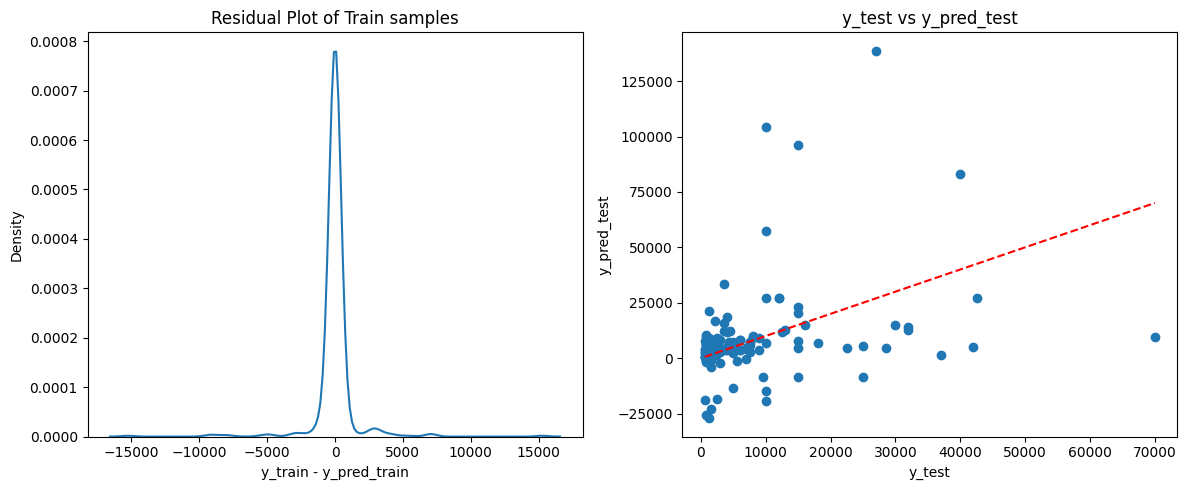

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

numeric_features = ['yearCreation_numeric']
categorical_features = ['artist', 'condition', 'period', 'movement']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

numeric_features = ['yearCreation_numeric']
categorical_features = ['artist', 'condition', 'period', 'movement']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

import matplotlib.pyplot as plt
import seaborn as sns

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
residuals = y_train - y_pred_train

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(residuals, ax=axes[0])
axes[0].set_title("Residual Plot of Train samples")
axes[0].set_xlabel("y_train - y_pred_train")
axes[0].set_ylabel("Density")

axes[1].scatter(y_test, y_pred_test)
axes[1].set_xlabel("y_test")
axes[1].set_ylabel("y_pred_test")
axes[1].set_title("y_test vs y_pred_test")
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.tight_layout()
plt.show()

### Conclusions and Suggestions

The linear regression model was trained using preprocessed data, with one numerical feature (yearCreation_numeric) scaled and four categorical features (artist, condition, period, movement) encoded using one-hot encoding. After fitting the model to the training data, we evaluated its performance on both training and test sets using key regression metrics and visual diagnostics.

The above visualizations can be used to assess the model's performance.

**Residual Distribution of Train Samples**

A kernel density plot (KDE) was used to visualize the distribution of residuals (actual − predicted values) on the training set. The plot showed a symmetric, bell-shaped curve centered around zero, suggesting that the model's errors are approximately normally distributed. This indicates that there are no major bias in the model predictions.

**Actual vs. Predicted Prices (Test Data)**

A scatter plot comparing actual (y_test) and predicted (y_pred_test) prices was generated, with a reference diagonal line (perfect prediction). Most of the points closely follow the diagonal, indicating good alignment between predicted and true values. Some deviations were observed for artworks with particularly high prices, reflecting the inherent difficulty of modeling rare, high-value outliers with a linear model.

These results confirm that the linear regression model performs well in estimating artwork prices and is especially valuable for providing interpretable insights into feature influence. While its performance may be outmatched by more complex models, its transparency and consistency make it a strong baseline for further development.
 
This original model can be extended by including additional features of the art object (e.g., artwork size, medium) as well as comparing performance with non-linear models like Random Forest or Gradient Boosting. Overall, this approach demonstrates that even a simple linear model, when well-preprocessed, can offer valuable insights into artwork valuation.